In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df=pd.read_json('logins.json')

In [208]:
df = df.set_index(['login_time'])
df['count'] = 0
df = df.resample('15Min').count()
df = df.reset_index()
df

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


In [211]:
df['day']=df['login_time'].dt.day

In [213]:
df['min'] = df['login_time'].dt.minute

In [214]:
df

,login_time,count,day,min
0,1970-01-01 20:00:00,2,1,0
1,1970-01-01 20:15:00,6,1,15
2,1970-01-01 20:30:00,9,1,30
3,1970-01-01 20:45:00,7,1,45
4,1970-01-01 21:00:00,1,1,0
...,...,...,...,...
9783,1970-04-13 17:45:00,5,13,45
9784,1970-04-13 18:00:00,5,13,0
9785,1970-04-13 18:15:00,2,13,15
9786,1970-04-13 18:30:00,7,13,30


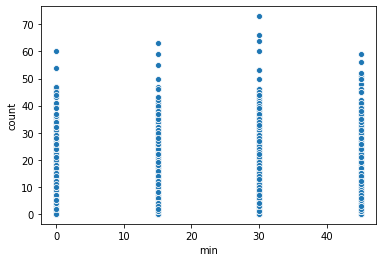

In [219]:
sns.scatterplot(x='min', y='count', data=df)

Higher frequency in 30 minute interval

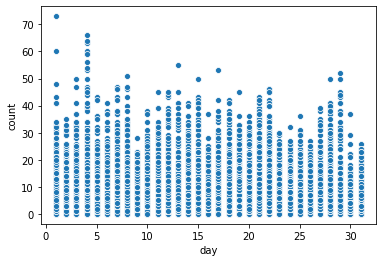

In [221]:
sns.scatterplot(x='day', y='count', data=df)

Higher counts observered on 4th

<Figure size 1440x360 with 0 Axes>

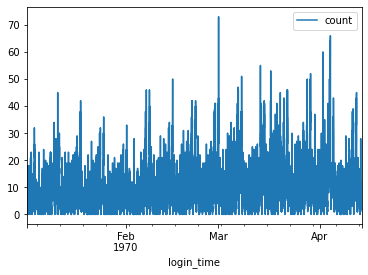

In [231]:
plt.figure(figsize=(20,5))
df.plot(x='login_time', y= 'count')

In [225]:
df.set_index('login_time')

,count,day,min
login_time,,,
1970-01-01 20:00:00,2,1,0
1970-01-01 20:15:00,6,1,15
1970-01-01 20:30:00,9,1,30
1970-01-01 20:45:00,7,1,45
1970-01-01 21:00:00,1,1,0
...,...,...,...
1970-04-13 17:45:00,5,13,45
1970-04-13 18:00:00,5,13,0
1970-04-13 18:15:00,2,13,15


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  9788 non-null   datetime64[ns]
 1   count       9788 non-null   int64         
 2   day         9788 non-null   int64         
 3   min         9788 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 306.0 KB


In [228]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['login_time'])
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None